In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [3]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/vcf_filtering/Msylvestris/raw_SNP.vcf.gz', '/users/mcevoysu/scratch/output/scikit-allel/Msylvestris/raw_SNP.h5', fields='*')

## Get data

In [4]:
callset_var_fn = '/users/mcevoysu/scratch/output/scikit-allel/Msylvestris/raw_SNP.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [5]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [6]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [7]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(366096,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=62.5M cbytes=13.4M cratio=4.7
   values=h5py._hl.group.Group>

In [8]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(236553,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 1, -1, -1], [0.001401,      nan,      nan], [b'A', b'', b''], 700, 0.119, b'chr1', 22019, -1, 0.    , False, False, 0.   , b'.', 0.3314, [  1,  -1,  -1], [0.001401,      nan,      nan], 60., 0., 218635, 13.37,   695.49, [-1, -1], b'C', -0.221, 0.584, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001401,      nan,      nan], [b'G', b'', b''], 700, 0.   , b'chr1',  6041, -1, 0.    , False, False, 0.   , b'.', 0.1222, [  1,  -1,  -1], [0.001401,      nan,      nan], 60., 0., 218827,  5.26,    36.82, [-1, -1], b'A',  0.   , 0.223, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001401,      nan,      nan], [b'C', b'', b''], 700, 0.   , b'chr1',  4495, -1, 0.    , False, False, 0.   , b'.', 0.0502, [  1,  -1,  -1], [0.001401,      nan,      nan], 60., 0., 218874,  5.31,    37.14, [-1, -1], b'T', -0.18 , 0.223, [0, 0, 0],  True, 1)
 ...
 ([13, -1, -1], [0.018   ,      nan,      nan], [b'C', b'', b''], 690, 0.173, b'scaffold928',  1141, -1, 0.    , False, False, 4.95 , b'.', 0.3182, [ 21,  -1,  -1], [0.03    ,      nan,      nan], 60., 0.,   1955, 15.15,   954.61, [-1, -1], b'T',  0.357, 2.192, [0, 0, 0],  True, 1)
 ([86, -1, -1], [0.125   ,      nan,      nan], [b'T', b'', b''], 700, 0.   , b'scaffold928',  1153, -1, 0.    , False, False, 8.972, b'.', 0.3315, [141,  -1,  -1], [0.197   ,      nan,      nan], 60., 0.,   1956, 27.33, 10439.4 , [-1, -1], b'A', -0.189, 0.235, [0, 0, 0],  True, 1)
 ([11, -1, -1], [0.016   ,      nan,      nan], [b'G', b'', b''], 690, 0.   , b'scaffold928',  1212, -1, 0.0005, False, False, 7.369, b'.', 0.287 , [ 21,  -1,  -1], [0.03    ,      nan,      nan], 60., 0.,   1960, 15.39,   938.69, [-1, -1], b'A',  0.319, 2.746, [0, 0, 0],  True, 1)]

In [9]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(129543,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([109,  -1,  -1], [0.153   ,      nan,      nan], [b'*', b'', b''], 700,   nan, b'chr1', 6977, -1, 9.5294,  True, False, 0., b'.', -0.1756, [130,  -1,  -1], [0.182   ,      nan,      nan],   nan, nan, 453349, 0.  , 0.0000e+00, [-1, -1], b'T',   nan, 0.123, [-1,  0,  0], False, 1)
 ([109,  -1,  -1], [0.153   ,      nan,      nan], [b'*', b'', b''], 700,   nan, b'chr1', 6864, -1, 9.6006,  True, False, 0., b'.', -0.1759, [130,  -1,  -1], [0.182   ,      nan,      nan], 60.  ,  0., 453350, 0.  , 1.0000e-02, [-1, -1], b'A', 0.324, 0.122, [-1,  0,  0], False, 1)
 ([  1,  -1,  -1], [0.001401,      nan,      nan], [b'*', b'', b''], 700,   nan, b'chr1', 8828, -1, 0.    ,  True, False, 0., b'.',  0.1573, [  1,  -1,  -1], [0.001401,      nan,      nan],   nan, nan, 631236, 0.  , 0.0000e+00, [-1, -1], b'A',   nan, 1.609, [-1,  0,  0], False, 1)
 ...
 ([ 96,  -1,  -1], [0.135   ,      nan,      nan], [b'*', b'', b''], 698,   nan, b'scaffold928', 1535, -1, 0.    ,  True, False, 0., b'.',  0.3884, [114,  -1,  -1], [0.16    ,      nan,      nan],   nan, nan,   1897, 0.  , 0.0000e+00, [-1, -1], b'T',   nan, 1.301, [-1,  0,  0], False, 1)
 ([  6, 103,  -1], [0.008451, 0.145   ,      nan], [b'G', b'*', b''], 696, 0.792, b'scaffold928', 1570, -1, 0.    , False, False, 0., b'.',  0.4736, [  8, 120,  -1], [0.011   , 0.169   ,      nan], 60.  ,  0.,   1900, 2.31, 7.5515e+02, [-1, -1], b'A', 0.431, 0.436, [ 0, -1,  0], False, 2)
 ([ 28,  95,  -1], [0.04    , 0.135   ,      nan], [b'C', b'*', b''], 692, 0.   , b'scaffold928', 1573, -1, 0.    , False, False, 0., b'.',  0.4001, [ 44, 130,  -1], [0.062   , 0.184   ,      nan], 59.98,  0.,   1901, 5.14, 2.2836e+03, [-1, -1], b'T', 0.204, 1.736, [ 0, -1,  0], False, 2)]

## Plot function

In [10]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [11]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [12]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 231017,   5461,     75])

In [13]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

5536

In [14]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(231017,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 1, -1, -1], [0.001401,      nan,      nan], [b'A', b'', b''], 700, 0.119, b'chr1', 22019, -1, 0.    , False, False, 0.   , b'.', 0.3314, [  1,  -1,  -1], [0.001401,      nan,      nan], 60., 0., 218635, 13.37,   695.49, [-1, -1], b'C', -0.221, 0.584, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001401,      nan,      nan], [b'G', b'', b''], 700, 0.   , b'chr1',  6041, -1, 0.    , False, False, 0.   , b'.', 0.1222, [  1,  -1,  -1], [0.001401,      nan,      nan], 60., 0., 218827,  5.26,    36.82, [-1, -1], b'A',  0.   , 0.223, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001401,      nan,      nan], [b'C', b'', b''], 700, 0.   , b'chr1',  4495, -1, 0.    , False, False, 0.   , b'.', 0.0502, [  1,  -1,  -1], [0.001401,      nan,      nan], 60., 0., 218874,  5.31,    37.14, [-1, -1], b'T', -0.18 , 0.223, [0, 0, 0],  True, 1)
 ...
 ([13, -1, -1], [0.018   ,      nan,      nan], [b'C', b'', b''], 690, 0.173, b'scaffold928',  1141, -1, 0.    , False, False, 4.95 , b'.', 0.3182, [ 21,  -1,  -1], [0.03    ,      nan,      nan], 60., 0.,   1955, 15.15,   954.61, [-1, -1], b'T',  0.357, 2.192, [0, 0, 0],  True, 1)
 ([86, -1, -1], [0.125   ,      nan,      nan], [b'T', b'', b''], 700, 0.   , b'scaffold928',  1153, -1, 0.    , False, False, 8.972, b'.', 0.3315, [141,  -1,  -1], [0.197   ,      nan,      nan], 60., 0.,   1956, 27.33, 10439.4 , [-1, -1], b'A', -0.189, 0.235, [0, 0, 0],  True, 1)
 ([11, -1, -1], [0.016   ,      nan,      nan], [b'G', b'', b''], 690, 0.   , b'scaffold928',  1212, -1, 0.0005, False, False, 7.369, b'.', 0.287 , [ 21,  -1,  -1], [0.03    ,      nan,      nan], 60., 0.,   1960, 15.39,   938.69, [-1, -1], b'A',  0.319, 2.746, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

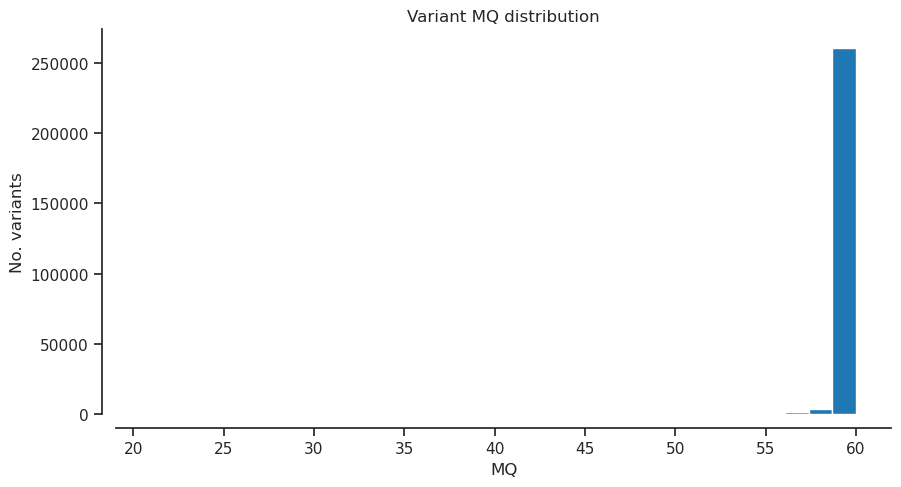

In [15]:
plot_hist('MQ','var') # RMS mapping quality

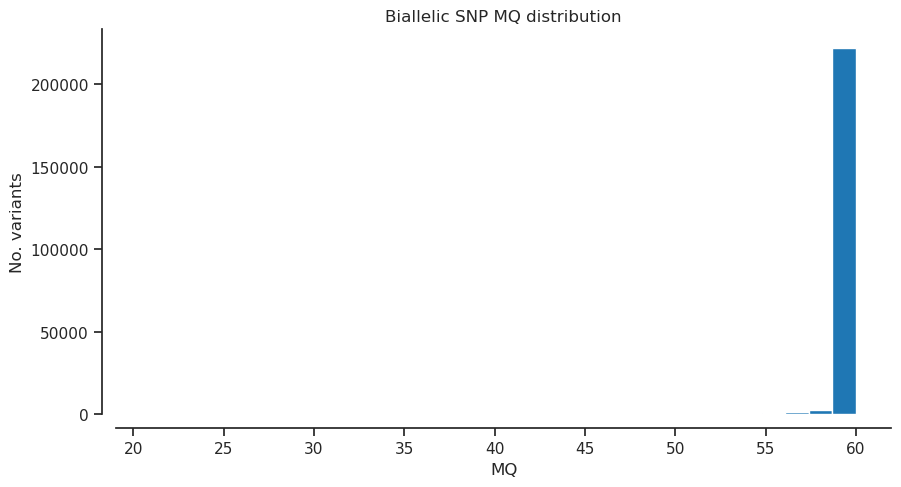

In [16]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [17]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

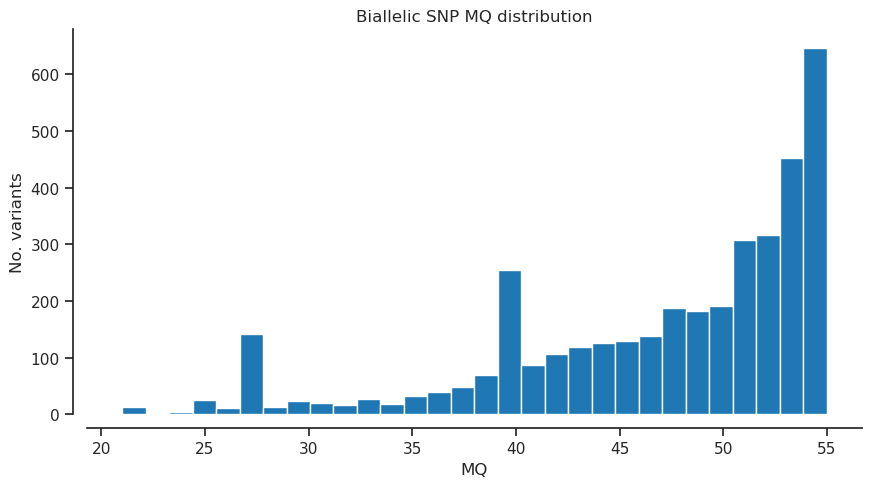

In [18]:
plot_hist('MQ')

In [19]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

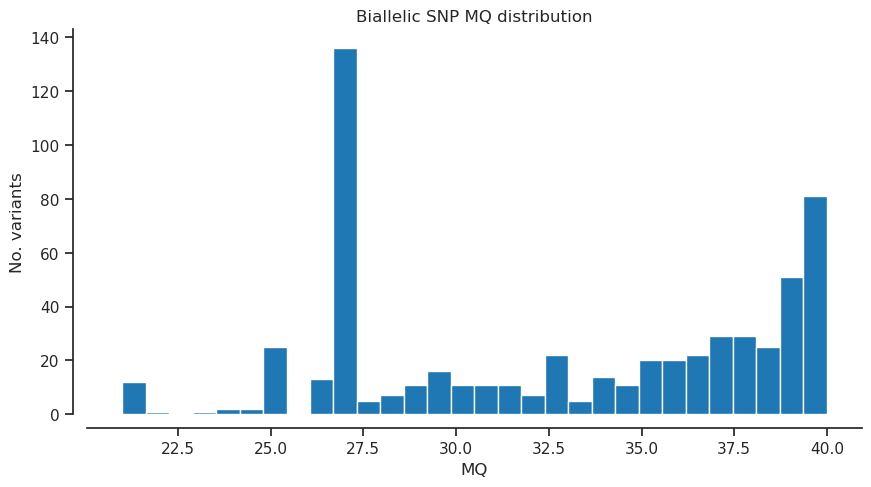

In [20]:
plot_hist('MQ')

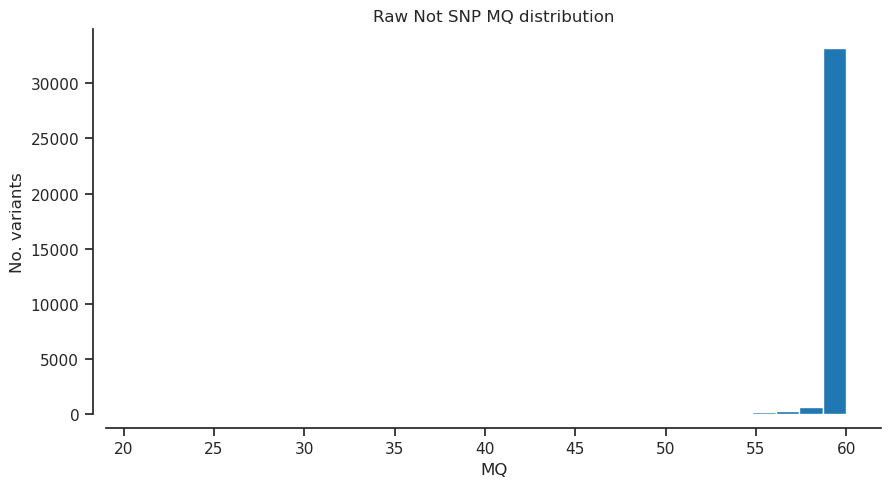

In [21]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

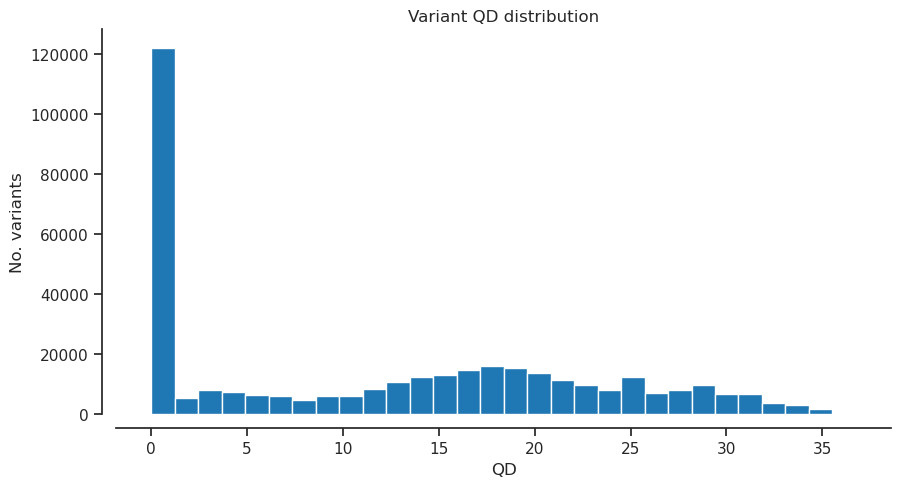

In [22]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

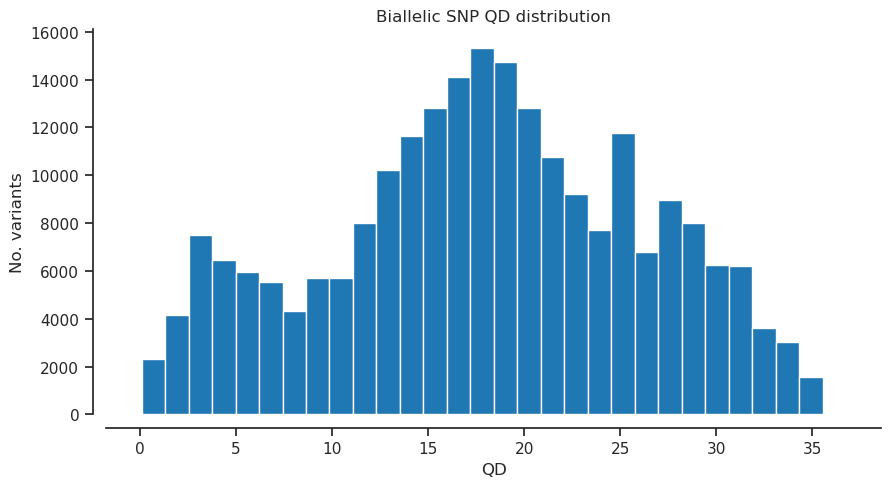

In [23]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [24]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

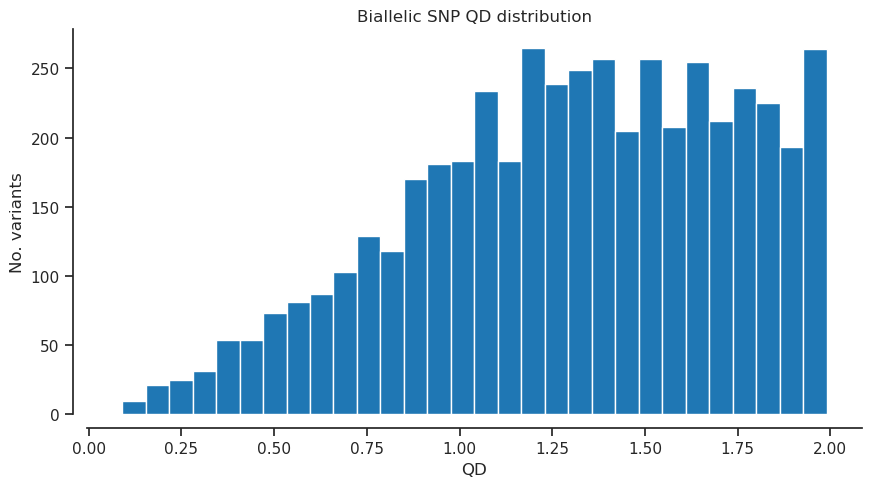

In [25]:
plot_hist('QD')

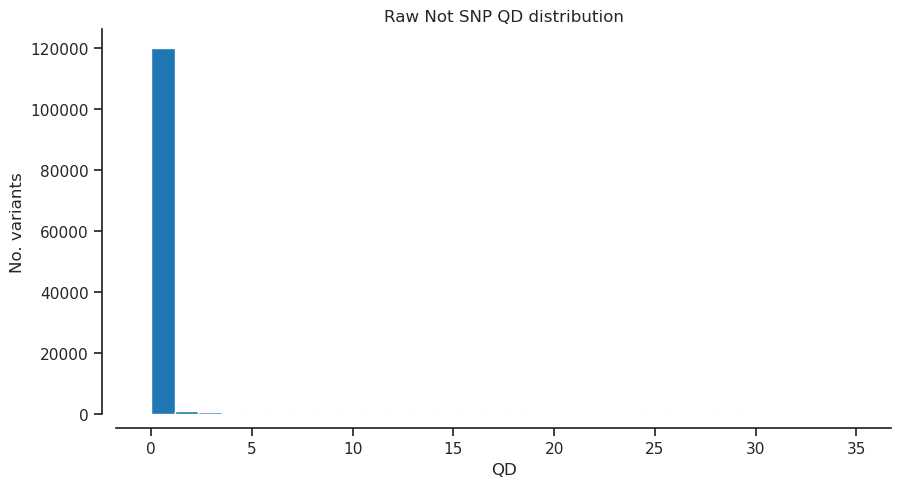

In [26]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

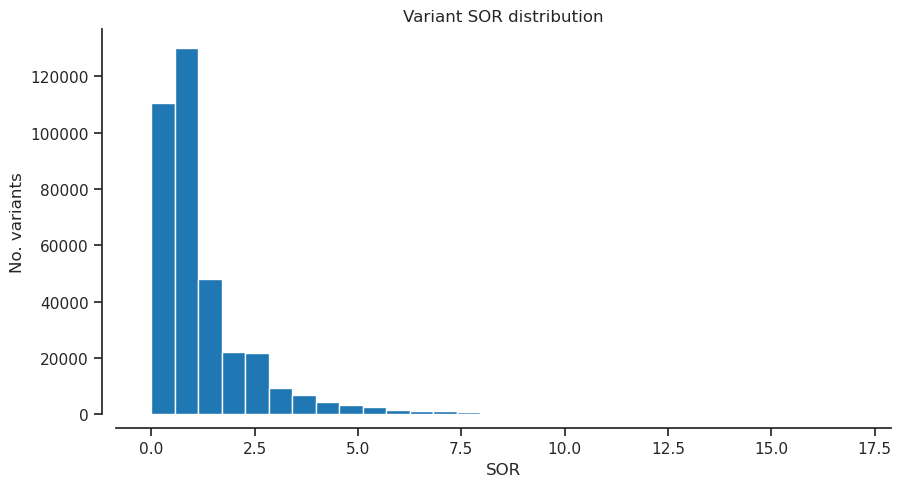

In [27]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

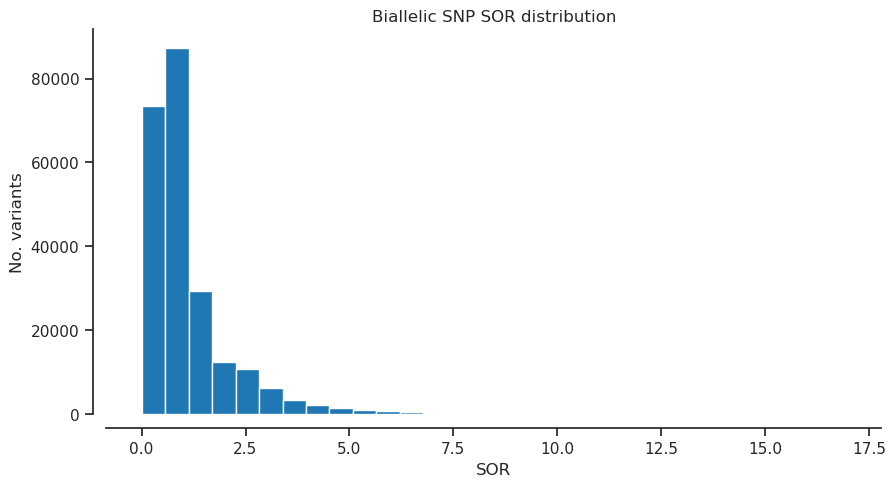

In [28]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [29]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

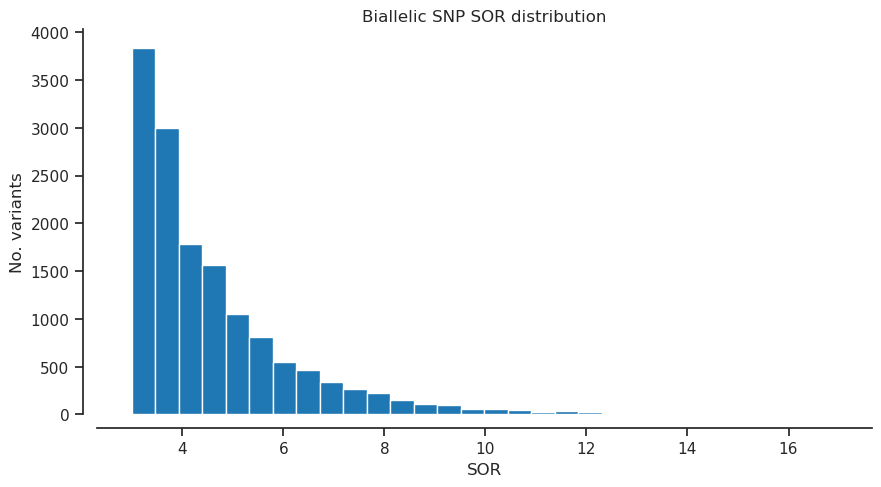

In [30]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

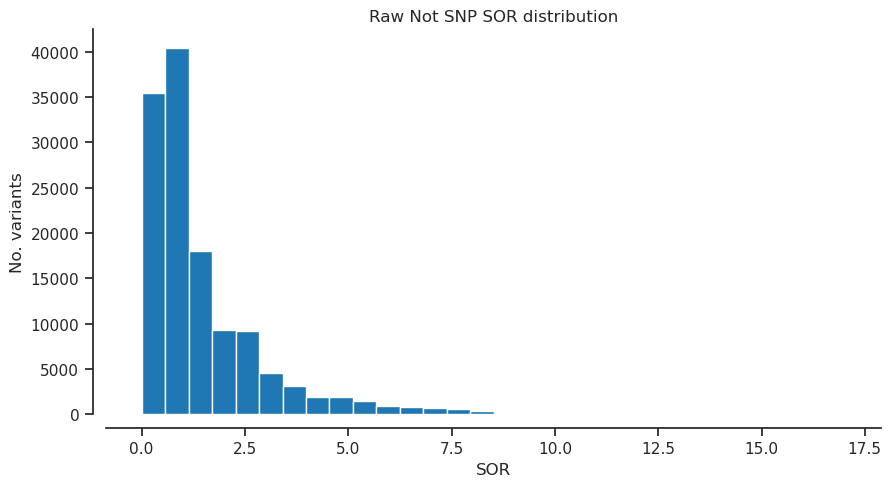

In [31]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

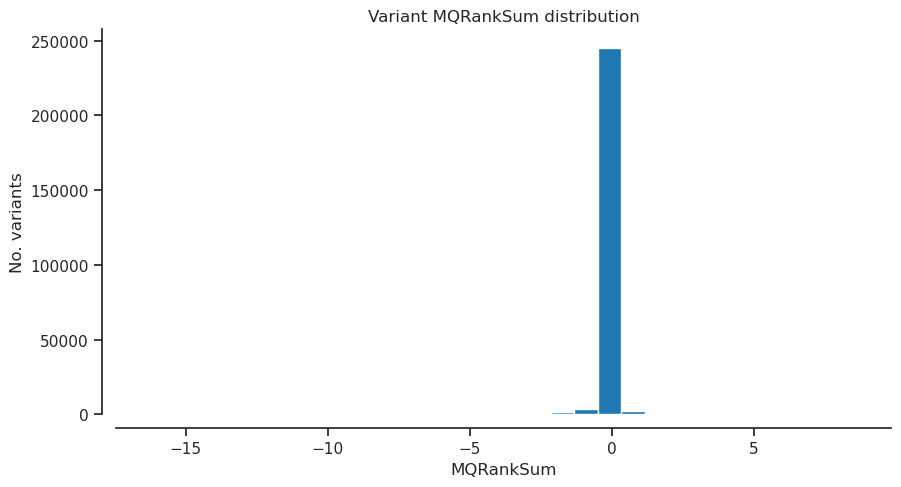

In [32]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

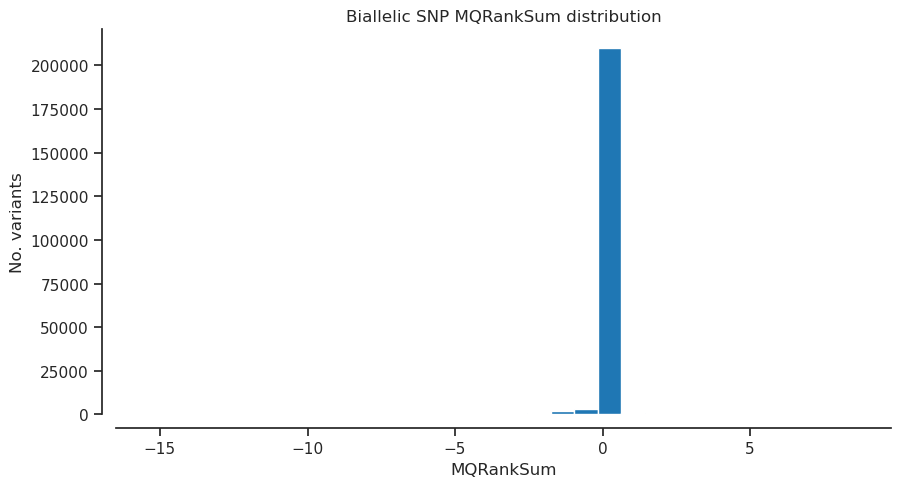

In [33]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [34]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

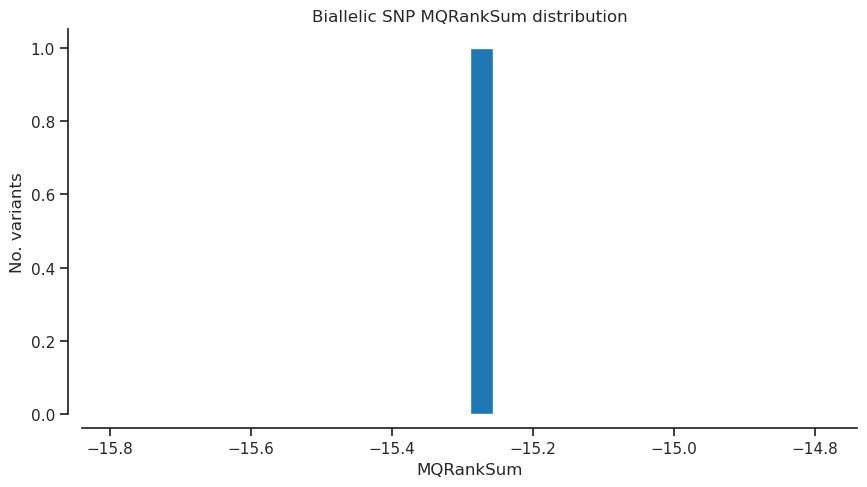

In [35]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

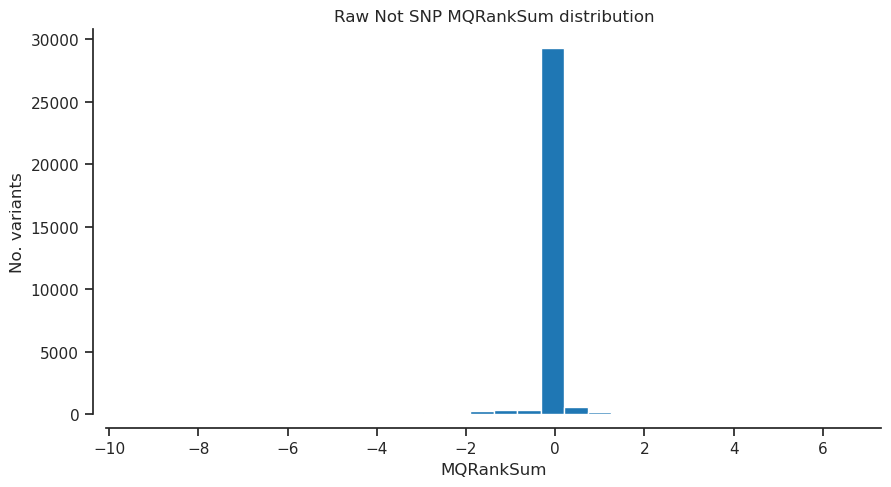

In [36]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

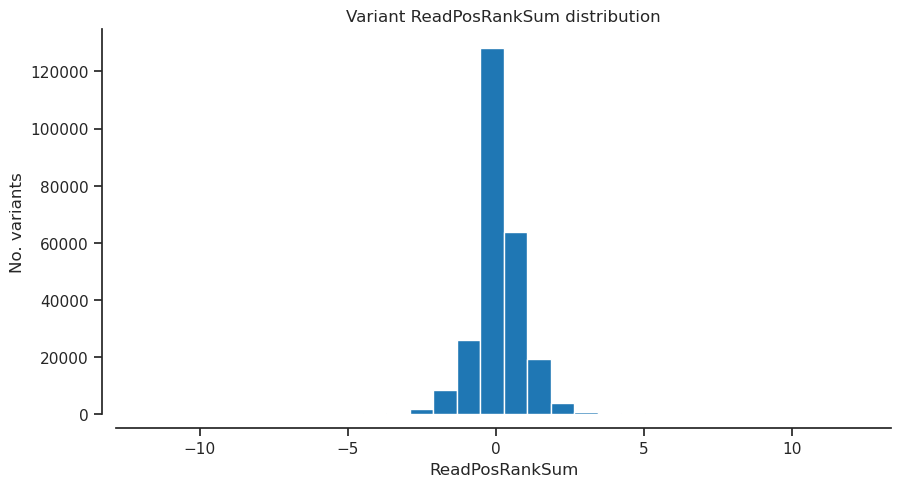

In [37]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

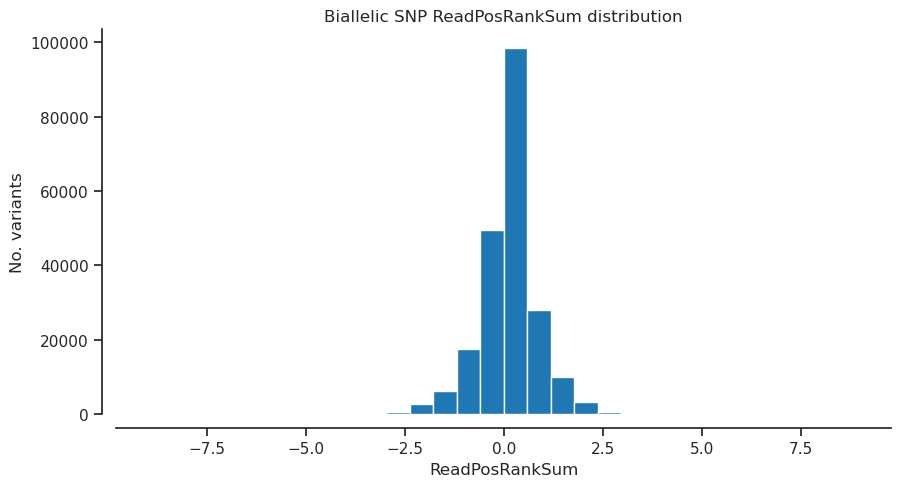

In [38]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

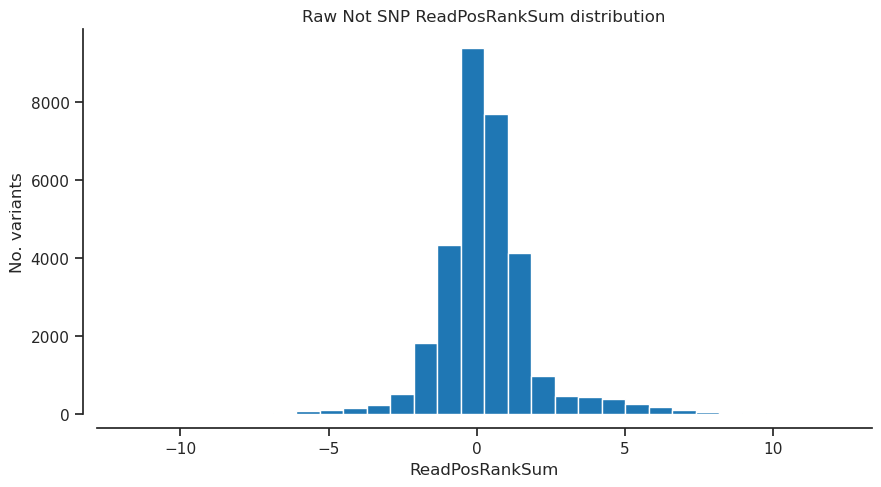

In [39]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

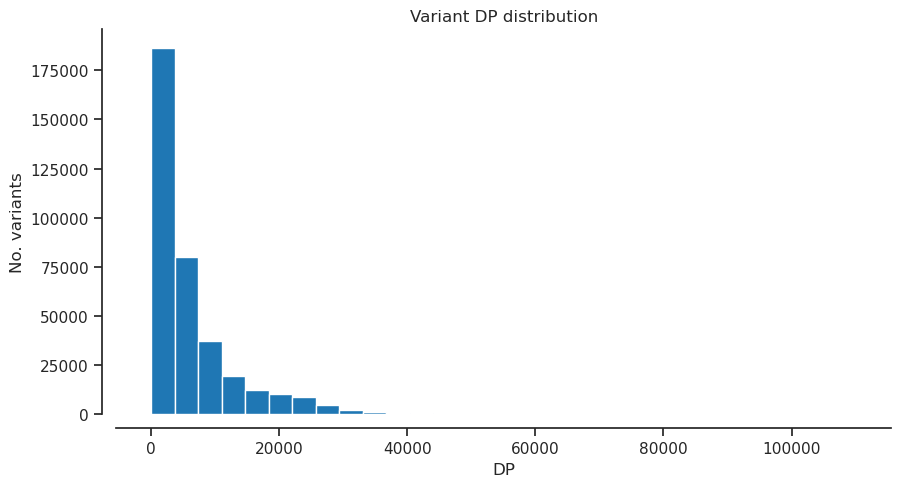

In [40]:
plot_hist('DP','var')

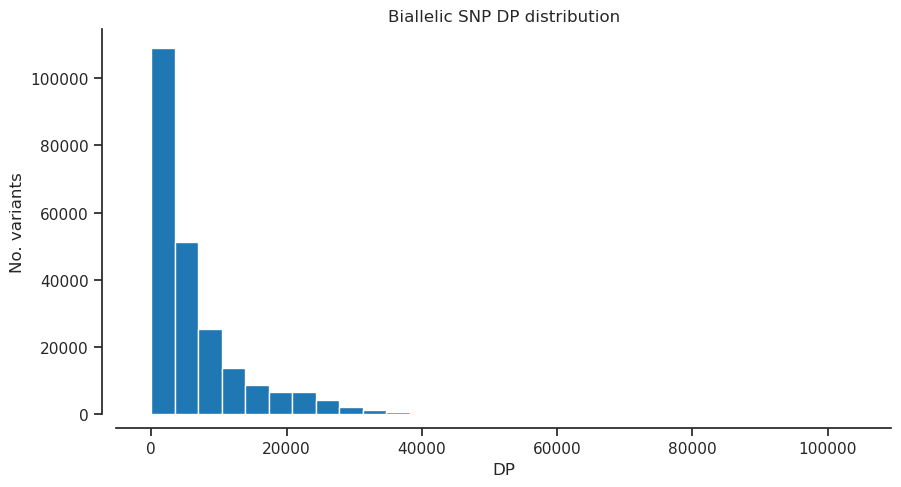

In [41]:
plot_hist('DP','biallelic')

In [42]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

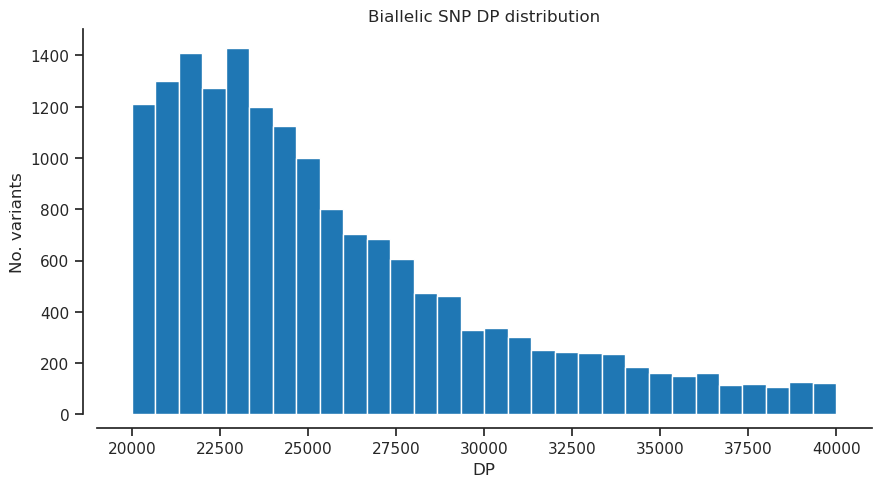

In [43]:
plot_hist('DP')

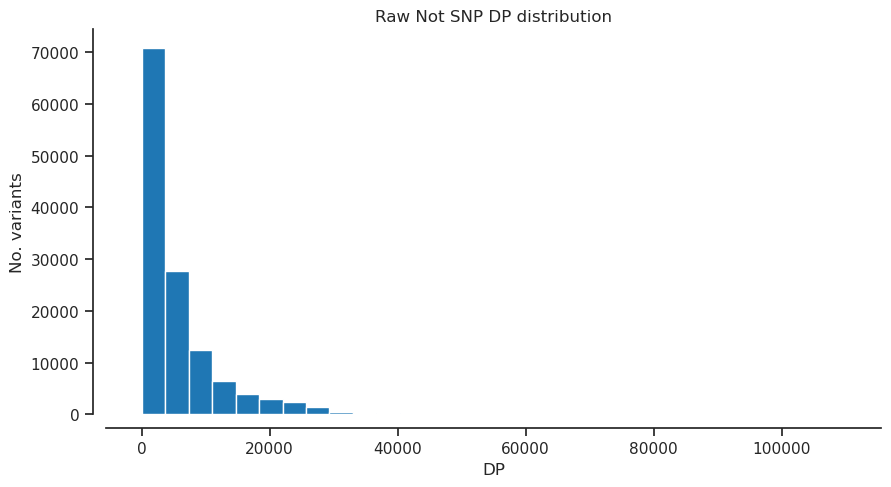

In [44]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

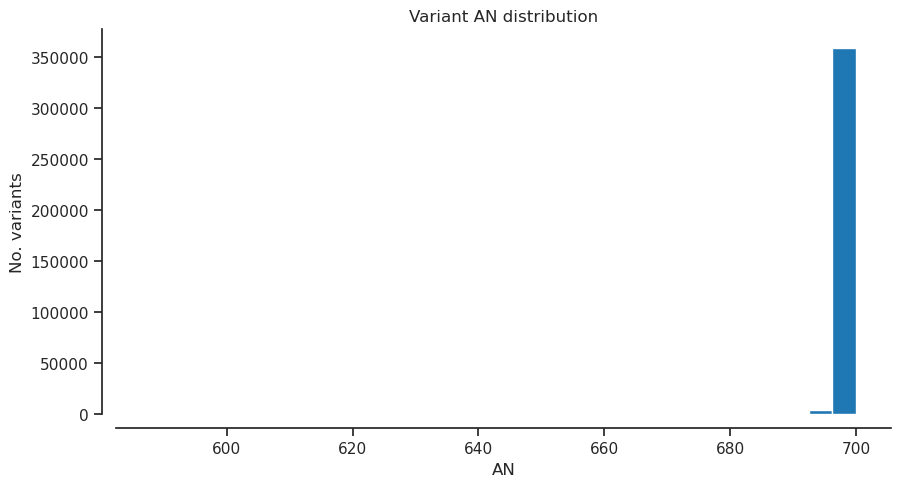

In [45]:
plot_hist('AN','var') # Total number of alleles in called genotypes

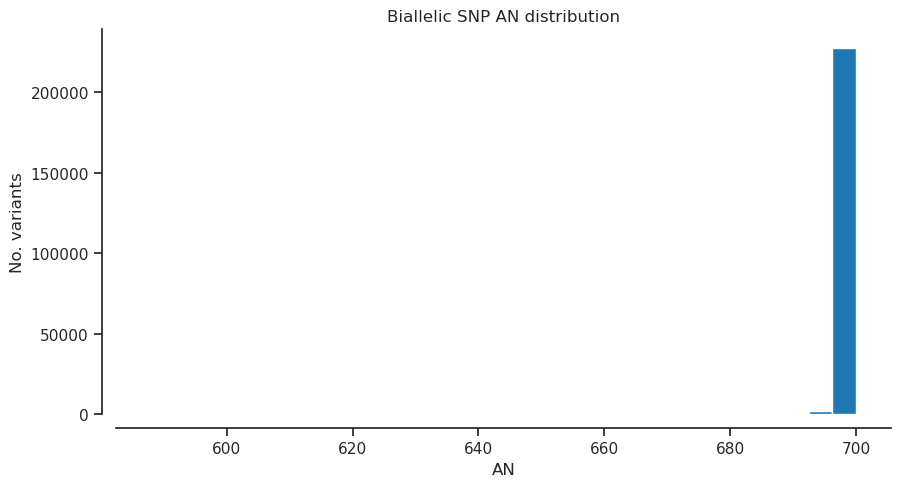

In [46]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

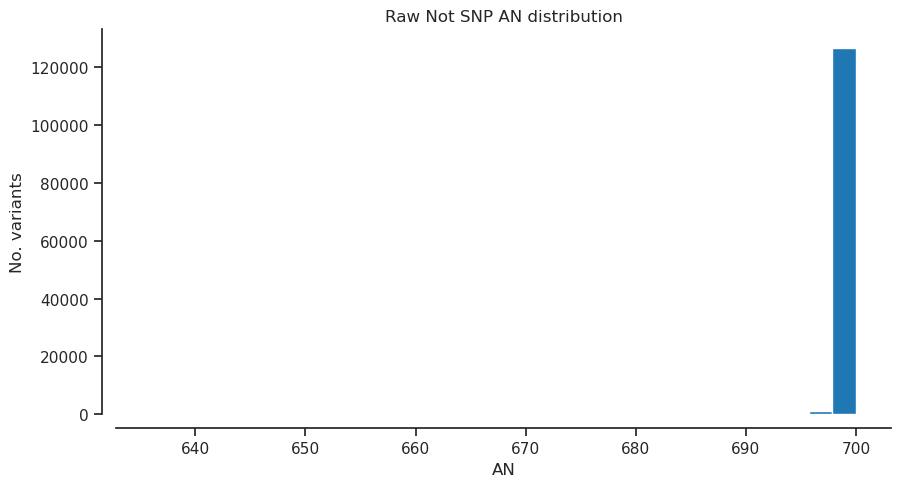

In [47]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [48]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

218964

## Genotype

In [49]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [50]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(366096, 350, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=244.4M cbytes=14.0M cratio=17.5
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [51]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(218964, 350, 2) dtype=int8 chunks=(1711, 350, 2)
   nbytes=146.2M cbytes=17.5M cratio=8.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [52]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(218964, 4) dtype=int32 chunks=(27371, 4)
   nbytes=3.3M cbytes=587.8K cratio=5.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [53]:
ac[:]

<AlleleCountsArray shape=(218964, 4) dtype=int32>
699   1   0   0
699   1   0   0
699   1   0   0
...
677  13   0   0
614  86   0   0
679  11   0   0

In [54]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[699,   1],
       [699,   1],
       [699,   1],
       ...,
       [677,  13],
       [614,  86],
       [679,  11]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

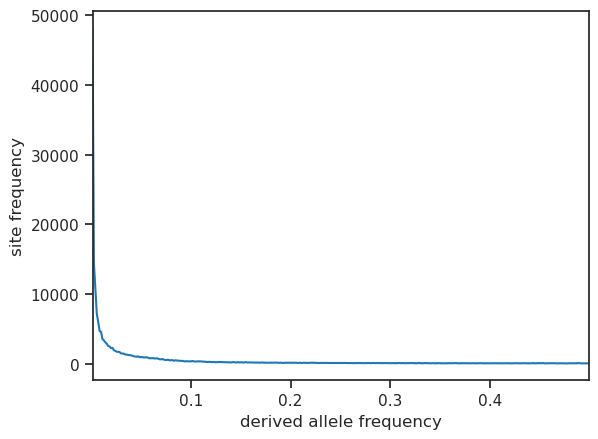

In [55]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [56]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(218964,) dtype=bool chunks=(218964,)
   nbytes=213.8K cbytes=26.0K cratio=8.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(213039, 350, 2) dtype=int8 chunks=(1665, 350, 2)
   nbytes=142.2M cbytes=16.7M cratio=8.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [58]:
n_variants = len(gt_biallelic)
n_variants

213039

In [59]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [60]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'DEU00129-001',
 b'DEU00129-002',
 b'DEU00129-003',
 b'DEU00129-004',
 b'DEU00129-005',
 b'DEU00129-006',
 b'DEU00129-007',
 b'DEU00129-008',
 b'DEU00129-009',
 b'DEU00129-010',
 b'DEU00129-011',
 b'DEU00129-012',
 b'DEU00129-013',
 b'DEU00129-014',
 b'DEU00129-015',
 b'DEU00129-016',
 b'DEU00129-017',
 b'DEU00129-018',
 b'DEU00129-019',
 b'DEU00129-020',
 b'DEU00129-021',
 b'DEU00129-022',
 b'DEU00129-023',
 b'DEU00129-024',
 b'DEU00129-025',
 b'DEU00130-001',
 b'DEU00130-002',
 b'DEU00130-003',
 b'DEU00130-004',
 b'DEU00130-005',
 b'DEU00130-006',
 b'DEU00130-007',
 b'DEU00130-008',
 b'DEU00130-009',
 b'DEU00130-010',
 b'DEU00130-011',
 b'DEU00130-012',
 b'DEU00130-013',
 b'DEU00130-014',
 b'DEU00130-015',
 b'DEU00130-016',
 b'DEU00130-017',
 b'DEU00130-018',
 b'DEU00130-019',
 b'DEU00130-020',
 b'DEU00130-021',
 b'DEU00130-022',
 b'DEU00130-023',
 b'DEU00130-024',
 b'DEU00130-025',
 b'DEU00159-001',
 b'DEU00159-002',
 b'DEU00159-003',
 b'DEU00159-004',
 b'DEU00159-005',
 b'DEU0015

In [66]:
samples_fn = '~/scratch/data/Msylvestris/Malus_sylvestris_sample_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,DEU00129-001,DEU00129
1,DEU00129-002,DEU00129
2,DEU00129-003,DEU00129
3,DEU00129-004,DEU00129
4,DEU00129-005,DEU00129
...,...,...
345,ITA00042-018,ITA00042
346,ITA00042-019,ITA00042
347,ITA00042-020,ITA00042
348,ITA00042-021,ITA00042


In [67]:
samples.Population.value_counts()

Population
DEU00129    25
DEU00130    25
DEU00159    25
DNK00031    25
DNK00028    25
DNK00076    25
DNK00056    25
DNK00059    25
DNK00074    25
DNK00075    23
ITA00042    22
DNK00002    21
DNK00032    18
DNK00010    18
DNK00054    13
DNK00011    10
Name: count, dtype: int64

In [68]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['DEU00129', 'DEU00130', 'DEU00159', 'DNK00002', 'DNK00010',
       'DNK00011', 'DNK00028', 'DNK00031', 'DNK00032', 'DNK00054',
       'DNK00056', 'DNK00059', 'DNK00074', 'DNK00075', 'DNK00076',
       'ITA00042'], dtype=object)

## Gt frequency function

In [69]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 16)
    pop2color = {'DEU00129': palette[0],
                 'DEU00130': palette[8],
                 'DEU00159': palette[1],
                 'DNK00002': palette[9],
                 'DNK00010': palette[2],
                 'DNK00011': palette[10],
                 'DNK00028': palette[3],
                 'DNK00031': palette[11],
                 'DNK00032': palette[4],
                 'DNK00054': palette[12],
                 'DNK00056': palette[5],
                 'DNK00059': palette[13],
                 'DNK00074': palette[6],
                 'DNK00075': palette[14],
                 'DNK00076': palette[7],
                'ITA00042': palette[15]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[7]),
              mpl.patches.Patch(color=palette[15])]
    ax.legend(handles=handles, labels=['DEU00129', 'DEU00130', 'DEU00159', 'DNK00002', 'DNK00010',
       'DNK00011', 'DNK00028', 'DNK00031', 'DNK00032', 'DNK00054',
       'DNK00056', 'DNK00059', 'DNK00074', 'DNK00075', 'DNK00076',
       'ITA00042'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

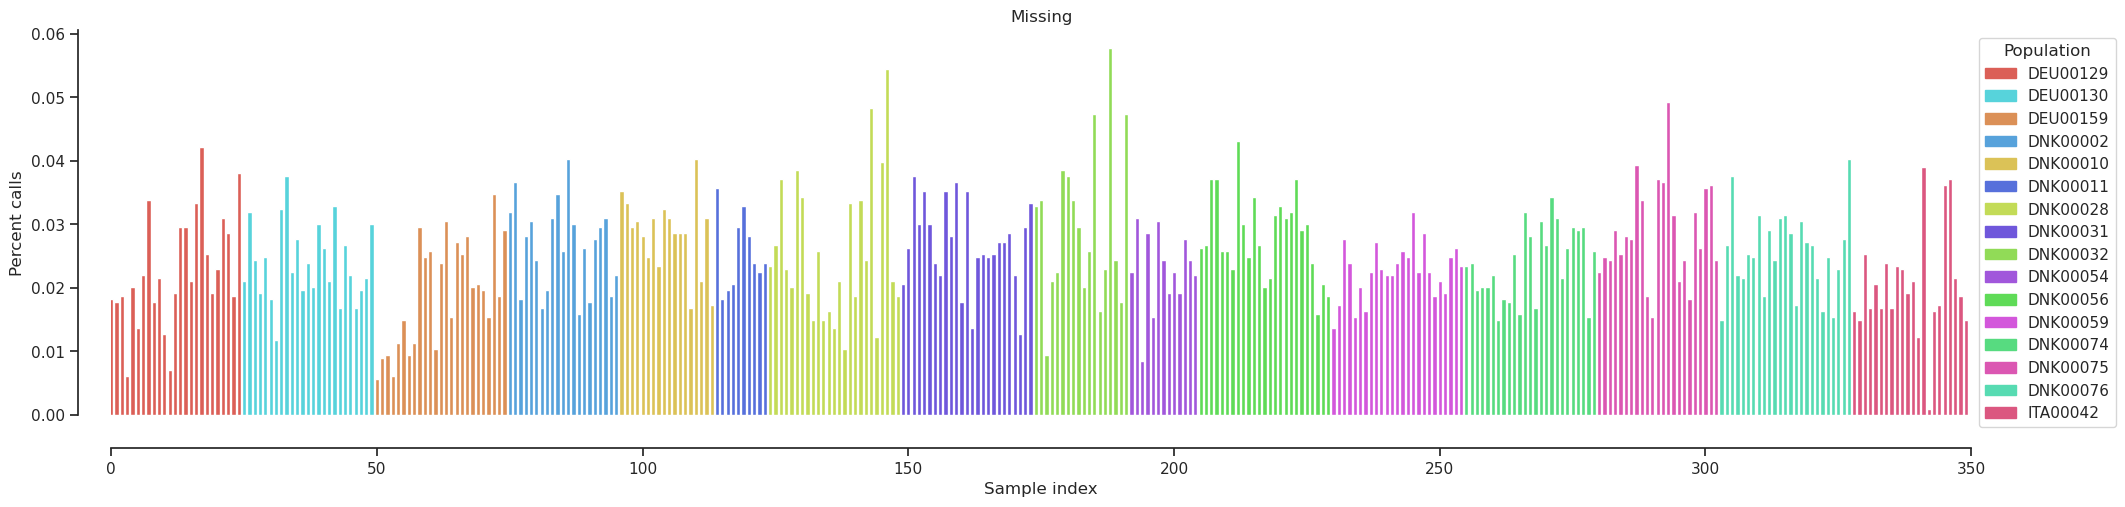

In [70]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

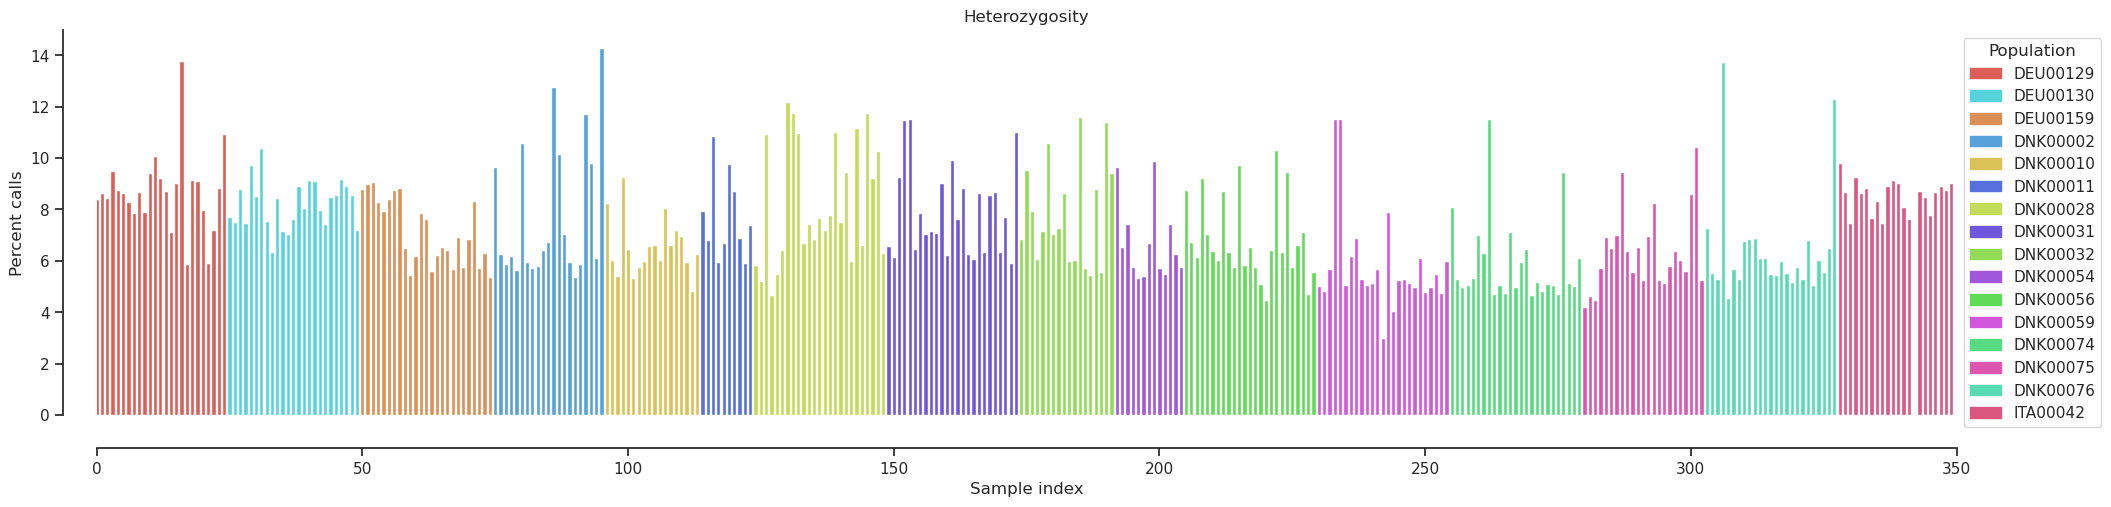

In [71]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [72]:
palette = sns.color_palette("hls",16)
pop_colours = {    
                'DEU00129': palette[0],
                 'DEU00130': palette[8],
                 'DEU00159': palette[1],
                 'DNK00002': palette[9],
                 'DNK00010': palette[2],
                 'DNK00011': palette[10],
                 'DNK00028': palette[3],
                 'DNK00031': palette[11],
                 'DNK00032': palette[4],
                 'DNK00054': palette[12],
                 'DNK00056': palette[5],
                 'DNK00059': palette[13],
                 'DNK00074': palette[6],
                 'DNK00075': palette[14],
                 'DNK00076': palette[7],
                'ITA00042': palette[15]
}

In [73]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [74]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(213039, 2) dtype=int32 chunks=(53260, 2)
   nbytes=1.6M cbytes=464.7K cratio=3.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [75]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(164797, 350) dtype=int8 chunks=(2575, 350)
   nbytes=55.0M cbytes=10.4M cratio=5.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [76]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

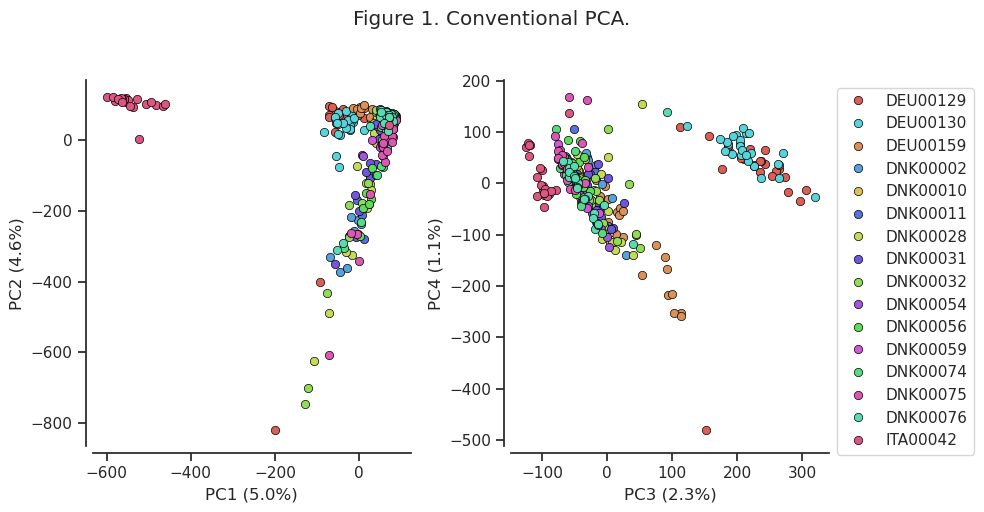

In [77]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [79]:
outliers = coords1[:,0]< -400
samples[outliers]

,ID,Population
328,ITA00042-001,ITA00042
329,ITA00042-002,ITA00042
330,ITA00042-003,ITA00042
331,ITA00042-004,ITA00042
332,ITA00042-005,ITA00042
333,ITA00042-006,ITA00042
334,ITA00042-007,ITA00042
335,ITA00042-008,ITA00042
336,ITA00042-009,ITA00042
337,ITA00042-010,ITA00042
